# What's in DP0.3?

In [17]:
from lsst.rsp import get_tap_service
import matplotlib.pyplot as plt

In [3]:
service = get_tap_service("ssotap")
print(service.baseurl)

https://data.lsst.cloud/api/ssotap


In [7]:
query = "SELECT * FROM tap_schema.schemas"
results = service.search(query).to_table()
results

description,schema_index,schema_name,utype
str512,int32,str64,str512
Data Preview 0.3 contains the catalog products of a Solar System Science Collaboration simulation of the results of SSO analysis of the wide-fast-deep data from the LSST ten-year dataset.,0,dp03_catalogs,
A TAP-standard-mandated schema to describe tablesets in a TAP 1.1 service,100000,tap_schema,
UWS Metadata,120000,uws,


In [9]:
query = "SELECT * FROM tap_schema.tables " \
        "WHERE tap_schema.tables.schema_name = 'dp03_catalogs' "
results = service.search(query).to_table()
results

description,schema_name,table_index,table_name,table_type,utype
str512,str512,int32,str64,str8,str512
Table to store 'difference image sources'; - sources detected at SNR >=5 on difference images.,dp03_catalogs,0,dp03_catalogs.DiaSource,table,
The orbit catalog produced by the Minor Planet Center. Ingested daily. O(10M) rows by survey end. The columns are described at https://minorplanetcenter.net//iau/info/MPOrbitFormat.html,dp03_catalogs,0,dp03_catalogs.MPCORB,table,
"LSST-computed per-object quantities. 1:1 relationship with MPCORB. Recomputed daily, upon MPCORB ingestion.",dp03_catalogs,0,dp03_catalogs.SSObject,table,
"LSST-computed per-source quantities. 1:1 relationship with DIASource. Recomputed daily, upon MPCORB ingestion.",dp03_catalogs,0,dp03_catalogs.SSSource,table,


In [13]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.DiaSource'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,_decTrue,double,,
1,_magTrue,float,,
2,_name,char,,
3,_raTrue,double,,
4,_V,float,,
5,ccdVisitId,long,Id of the ccdVisit where this diaSource was me...,
6,decl,double,Decl-coordinate of the center of this diaSource.,deg
7,declSigma,float,Uncertainty of decl.,deg
8,diaObjectId,long,Id of the diaObject this source was associated...,
9,diaSourceId,long,Unique id.,


In [15]:
results = service.search("SELECT SSObjectId, ra, decl, mag "
                         "FROM dp03_catalogs.DiaSource "
                         "WHERE CONTAINS(POINT('ICRS', ra, decl), "
                         "CIRCLE('ICRS', 1.0, 0, 1.0)) = 1 "
                         "AND mag < 18").to_table().to_pandas()
results

,SSObjectId,ra,decl,mag
0,2329222133894960463,0.969090,-0.536108,17.949049
1,2329222133894960463,1.450462,-0.627601,17.824034
2,2329222133894960463,1.450564,-0.628187,17.876307
3,2329222133894960463,1.450445,-0.627540,17.823175
4,2329222133894960463,1.450551,-0.628119,17.873587
...,...,...,...,...
7018,-5689820909104097322,0.989573,-0.465091,16.584377
7019,-5689820909104097322,0.486250,-0.839715,16.554338
7020,-5689820909104097322,0.487238,-0.838903,16.560686
7021,-5689820909104097322,1.479437,-0.126746,16.615915


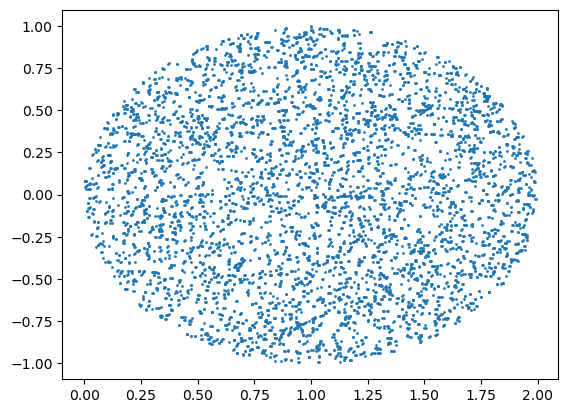

In [20]:
plt.plot(results['ra'], results['decl'], 'o', ms=2, mew=0)

In [21]:
results = service.search("SELECT column_name, datatype, description, unit from TAP_SCHEMA.columns "
                         "WHERE table_name = 'dp03_catalogs.SSObject'")
results.to_table().to_pandas()

,column_name,datatype,description,unit
0,arc,float,Arc of LSST observations,days
1,discoverySubmissionDate,double,The date the LSST first linked and submitted t...,date
2,firstObservationDate,double,The time of the first LSST observation of this...,date
3,flags,long,"Flags, bitwise OR tbd.",
4,gChi2,float,Chi^2 statistic of the phase curve fit (g band),
5,gG12,float,Best fit G12 slope parameter (g band),mag
6,gG12Err,float,Uncertainty of G12 (g band),mag
7,gH,float,Best fit absolute magnitude (g band),mag
8,gH_gG12_Cov,float,H-G12 covariance (g band),mag^2
9,gHErr,float,Uncertainty of H (g band),mag


H G1 G2 defined in:
https://ui.adsabs.harvard.edu/abs/2010Icar..209..542M/abstract